In [14]:
from sys import maxsize #para imprimir arrays completos
import numpy as np
import pandas as pd
import re as regex
import math as math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
pathArchivoDataSet = 'mushrooms.csv'
mushrooms = pd.read_csv(pathArchivoDataSet)

In [16]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
444,e,x,s,y,t,l,f,c,b,w,...,s,w,w,p,w,o,p,k,n,m
702,e,x,y,y,t,l,f,c,b,n,...,y,w,w,p,w,o,p,k,s,p
3334,p,x,f,g,f,f,f,c,b,g,...,k,b,p,p,w,o,l,h,v,g
7901,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
5880,p,x,s,b,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,g
5534,e,f,y,n,t,n,f,c,b,e,...,s,w,e,p,w,t,e,w,c,w
4109,e,f,y,g,t,n,f,c,b,w,...,s,w,g,p,w,o,p,k,y,d
1931,e,b,s,w,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,s,g
5881,p,x,f,y,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,y,g
7390,e,b,s,w,f,n,f,w,b,w,...,k,w,w,p,w,t,p,w,s,g


In [18]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [27]:
def getDescriptForEachColumns(df):
    
    for column in df:
                
        ##Attribute Information: (classes: edible=e, poisonous=p)
        if column == 'class':
            df[column] = df[column].replace('e', 'Edible')
            df[column] = df[column].replace('p', 'poisonous')
        
        #cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
        elif column == 'cap-shape':
            df[column] = df[column].replace('b', 'bell')
            df[column] = df[column].replace('c', 'conical')
            df[column] = df[column].replace('x', 'convex')
            df[column] = df[column].replace('f', 'flat')
            df[column] = df[column].replace('k', 'knobbed')
            df[column] = df[column].replace('s', 'sunken')
            
        #cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
        elif column == 'cap-surface':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('g', 'grooves')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('s', 'smooth')
        
        #cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
        elif column == 'cap-color':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('r', 'green')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #bruises: bruises=t,no=f
        elif column == 'bruises':
            df[column] = df[column].replace('t', 'bruises')
            df[column] = df[column].replace('f', 'no')
        
        #odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
        elif column == 'odor':
            df[column] = df[column].replace('a', 'almond')
            df[column] = df[column].replace('l', 'anise')
            df[column] = df[column].replace('c', 'creosote')
            df[column] = df[column].replace('y', 'fishy')
            df[column] = df[column].replace('f', 'foul')
            df[column] = df[column].replace('m', 'musty')
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('p', 'pungent')
            df[column] = df[column].replace('s', 'spicy')
                    
        #gill-attachment: attached=a,descending=d,free=f,notched=n
        elif column == 'gill-attachment':
            df[column] = df[column].replace('a', 'attached')
            df[column] = df[column].replace('d', 'descending')
            df[column] = df[column].replace('f', 'free')
            df[column] = df[column].replace('n', 'notched')
        
        #gill-spacing: close=c,crowded=w,distant=d
        elif column == 'gill-spacing':
            df[column] = df[column].replace('c', 'close')
            df[column] = df[column].replace('w', 'crowded')
            df[column] = df[column].replace('d', 'distant')
        
        #gill-size: broad=b,narrow=n
        elif column == 'gill-size':
            df[column] = df[column].replace('b', 'broad')
            df[column] = df[column].replace('n', 'narrow')
        
        #gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
        elif column == 'gill-color':
            df[column] = df[column].replace('k', 'black')
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('h', 'chocolate')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('r', 'green')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #stalk-shape: enlarging=e,tapering=t
        elif column == 'stalk-shape':
            df[column] = df[column].replace('e', 'enlarging')
            df[column] = df[column].replace('t', 'tapering')
        
        #stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
        elif column == 'stalk-root':
            df[column] = df[column].replace('b', 'bulbous')
            df[column] = df[column].replace('c', 'club')
            df[column] = df[column].replace('u', 'cup')
            df[column] = df[column].replace('e', 'equal')
            df[column] = df[column].replace('z', 'rhizomorphs')
            df[column] = df[column].replace('r', 'rooted')
            df[column] = df[column].replace('?', 'missing')
            
        #stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
        elif column == 'stalk-surface-above-ring':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('k', 'silky')
            df[column] = df[column].replace('s', 'smooth')
        
        #stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
        elif column == 'stalk-surface-below-ring':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('k', 'silky')
            df[column] = df[column].replace('s', 'smooth')
        
        #stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
        elif column == 'stalk-color-above-ring':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
        elif column == 'stalk-color-below-ring':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')

        
        #veil-type: partial=p,universal=u
        elif column == 'veil-type':
            df[column] = df[column].replace('p', 'partial')
            df[column] = df[column].replace('u', 'universal')

        #veil-color: brown=n,orange=o,white=w,yellow=y
        elif column == 'veil-color':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')

        #ring-number: none=n,one=o,two=t
        elif column == 'ring-number':
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('o', 'one')
            df[column] = df[column].replace('t', 'two')

        #ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
        elif column == 'ring-type':
            df[column] = df[column].replace('c', 'cobwebby')
            df[column] = df[column].replace('e', 'evanescent')
            df[column] = df[column].replace('f', 'flaring')
            df[column] = df[column].replace('l', 'large')
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('p', 'pendant')
            df[column] = df[column].replace('s', 'sheathing')
            df[column] = df[column].replace('z', 'zone')
            
        #spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
        elif column == 'spore-print-color':
            df[column] = df[column].replace('k', 'black')
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('h', 'chocolate')
            df[column] = df[column].replace('g', 'green')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
        elif column == 'population':
            df[column] = df[column].replace('a', 'abundant')
            df[column] = df[column].replace('c', 'clustered')
            df[column] = df[column].replace('n', 'numerous')
            df[column] = df[column].replace('s', 'scattered')
            df[column] = df[column].replace('v', 'several')
            df[column] = df[column].replace('y', 'solitary')

        #habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
        elif column == 'habitat':
            df[column] = df[column].replace('g', 'grasses')
            df[column] = df[column].replace('l', 'leaves')
            df[column] = df[column].replace('m', 'meadows')
            df[column] = df[column].replace('p', 'paths')
            df[column] = df[column].replace('u', 'urban')
            df[column] = df[column].replace('w', 'waste')
            df[column] = df[column].replace('d', 'woods')
            

In [28]:
getDescriptForEachColumns(mushrooms)

In [29]:
mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7409,poisonous,knobbed,scaly,red,no,foul,free,close,narrow,buff,...,silky,pink,pink,partial,white,one,evanescent,white,several,leaves
2179,Edible,convex,scaly,gray,bruises,none,free,close,broad,purple,...,smooth,pink,white,partial,white,one,pendant,black,solitary,woods
4221,poisonous,flat,fibrous,yellow,no,foul,free,close,broad,gray,...,silky,buff,pink,partial,white,one,large,chocolate,several,woods
3307,Edible,flat,scaly,brown,bruises,none,free,close,broad,brown,...,smooth,white,pink,partial,white,one,pendant,brown,solitary,woods
7119,Edible,knobbed,fibrous,white,no,none,free,crowded,broad,white,...,silky,white,white,partial,white,two,pendant,white,numerous,grasses
1674,Edible,flat,smooth,brown,no,none,free,crowded,broad,pink,...,smooth,white,white,partial,white,one,evanescent,black,scattered,grasses
3054,Edible,flat,scaly,gray,bruises,none,free,close,broad,purple,...,smooth,gray,pink,partial,white,one,pendant,brown,solitary,woods
3772,Edible,flat,scaly,brown,bruises,none,free,close,broad,pink,...,smooth,gray,pink,partial,white,one,pendant,brown,several,woods
2108,Edible,convex,fibrous,gray,bruises,none,free,close,broad,white,...,smooth,pink,white,partial,white,one,pendant,black,several,woods
6805,poisonous,flat,scaly,red,no,foul,free,close,narrow,buff,...,smooth,white,pink,partial,white,one,evanescent,white,several,leaves


In [30]:
def getInfoByColumn(df):
    
    for column in df:
        
        InfoBasica = df[column].describe()
        
        uniqueValuesCount = len(df[column].unique())
        
        if (uniqueValuesCount < 10):
            
            ShowUnique = 'Show Unique  ' + str(df[column].unique()).strip('[]')
        else:
            ShowUnique = 'Show Unique  ' + str(df[column].unique()[0:30]).strip('[]') + ',etc...'
        
        print('Información columna: {} \n''---------------\n{}'.format(column, InfoBasica))
        print('{}''\n'.format(ShowUnique))

In [31]:
getInfoByColumn(mushrooms)

Información columna: class 
---------------
count       8124
unique         2
top       Edible
freq        4208
Name: class, dtype: object
Show Unique  'poisonous' 'Edible'

Información columna: cap-shape 
---------------
count       8124
unique         6
top       convex
freq        3656
Name: cap-shape, dtype: object
Show Unique  'convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'

Información columna: cap-surface 
---------------
count      8124
unique        4
top       scaly
freq       3244
Name: cap-surface, dtype: object
Show Unique  'smooth' 'scaly' 'fibrous' 'grooves'

Información columna: cap-color 
---------------
count      8124
unique       10
top       brown
freq       2284
Name: cap-color, dtype: object
Show Unique  'brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green',etc...

Información columna: bruises 
---------------
count     8124
unique       2
top         no
freq      4748
Name: bruises, dtype: object
Show Unique  'bruises' 'no'

Inform

In [32]:
#Funión para graficar un histograma por cada columna del dataset
def getHistogramByColumn(df):
    for column in df:

        #Gráfica Histograma:
        Histograma = df[column].hist(grid=False, color='indigo', bins=10, xlabelsize=10, xrot=45)
        
        #Título y nombre de ejes: 
        plt.xlabel(column, fontsize= 13, color='green')
        plt.ylabel('Freq.',fontsize= 13, color='green')
        plt.title('Columna: ' + column, fontsize= 20, color='mediumslateblue')
        
        plt.show()
        print (Histograma)

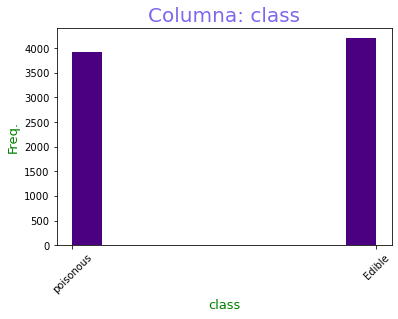

AxesSubplot(0.125,0.125;0.775x0.755)


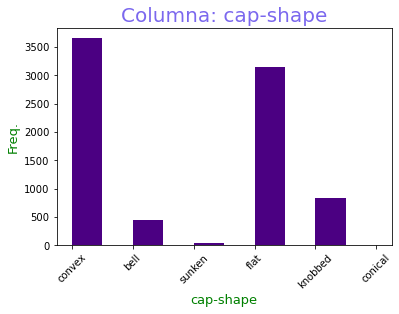

AxesSubplot(0.125,0.125;0.775x0.755)


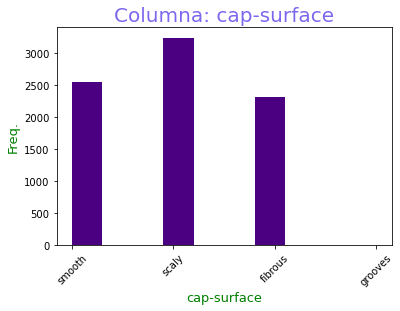

AxesSubplot(0.125,0.125;0.775x0.755)


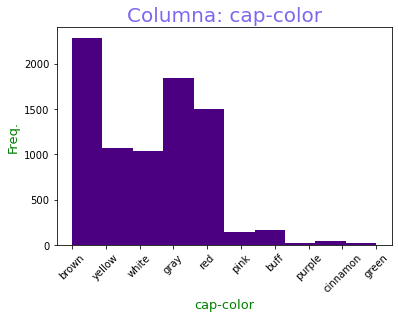

AxesSubplot(0.125,0.125;0.775x0.755)


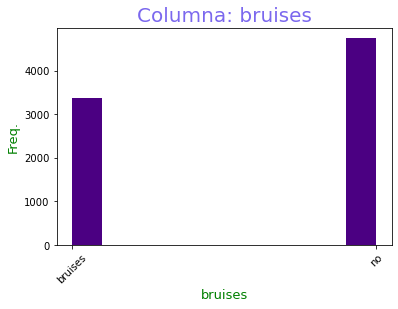

AxesSubplot(0.125,0.125;0.775x0.755)


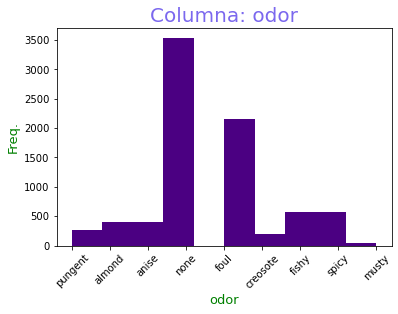

AxesSubplot(0.125,0.125;0.775x0.755)


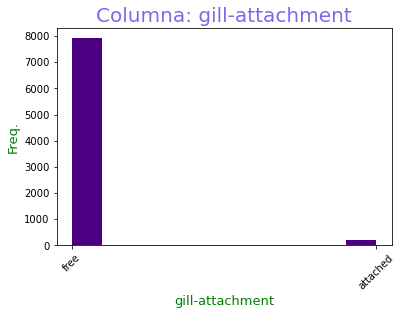

AxesSubplot(0.125,0.125;0.775x0.755)


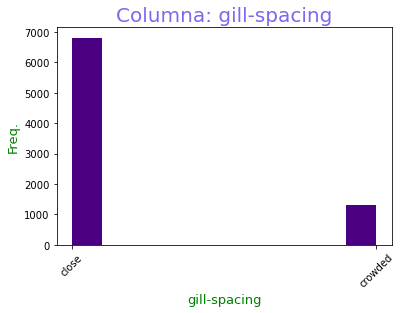

AxesSubplot(0.125,0.125;0.775x0.755)


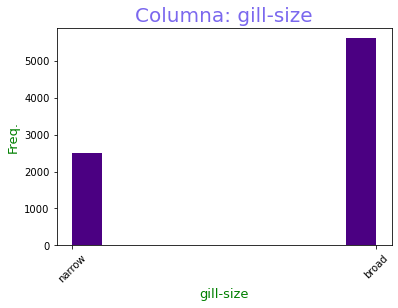

AxesSubplot(0.125,0.125;0.775x0.755)


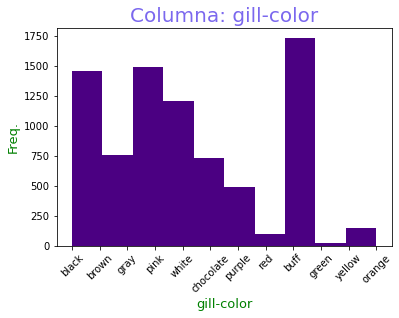

AxesSubplot(0.125,0.125;0.775x0.755)


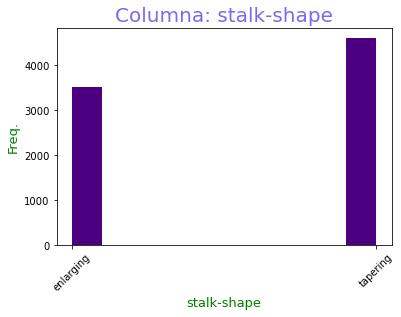

AxesSubplot(0.125,0.125;0.775x0.755)


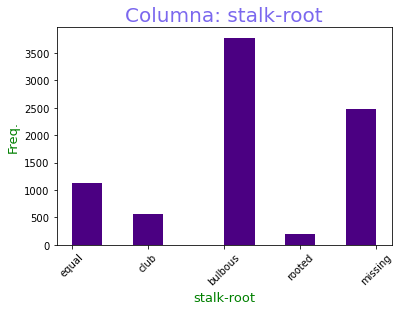

AxesSubplot(0.125,0.125;0.775x0.755)


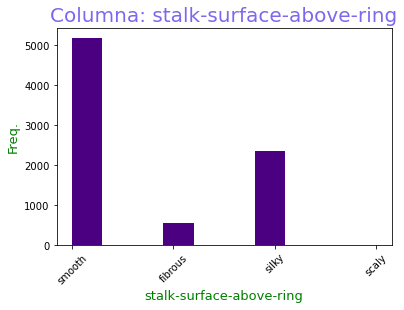

AxesSubplot(0.125,0.125;0.775x0.755)


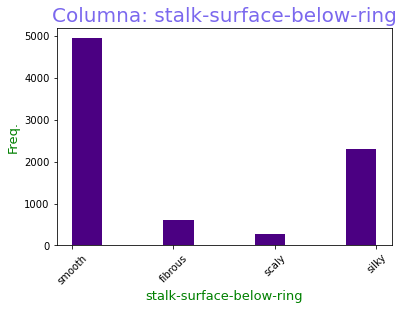

AxesSubplot(0.125,0.125;0.775x0.755)


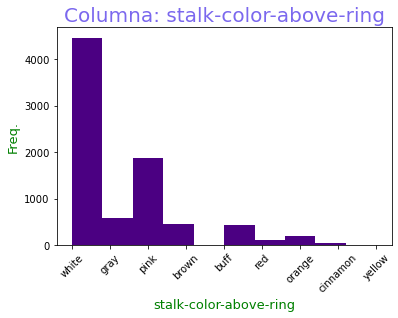

AxesSubplot(0.125,0.125;0.775x0.755)


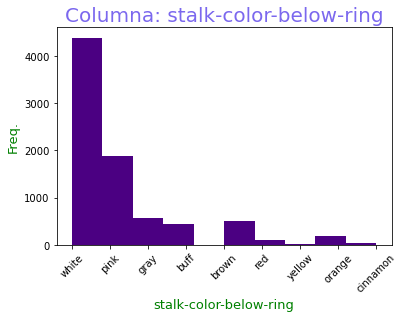

AxesSubplot(0.125,0.125;0.775x0.755)


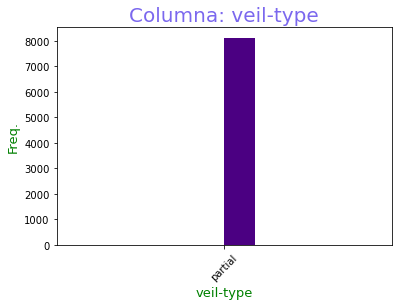

AxesSubplot(0.125,0.125;0.775x0.755)


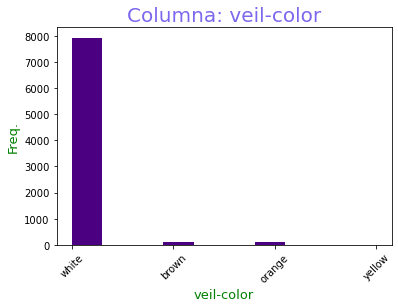

AxesSubplot(0.125,0.125;0.775x0.755)


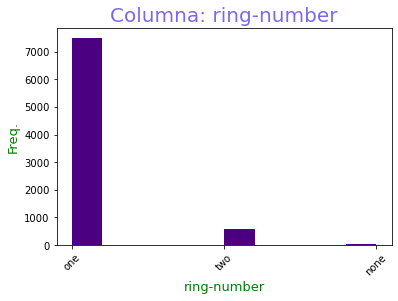

AxesSubplot(0.125,0.125;0.775x0.755)


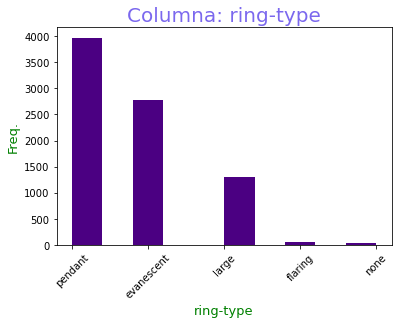

AxesSubplot(0.125,0.125;0.775x0.755)


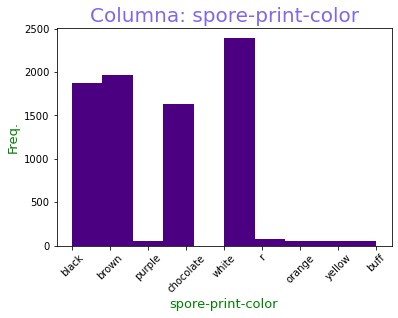

AxesSubplot(0.125,0.125;0.775x0.755)


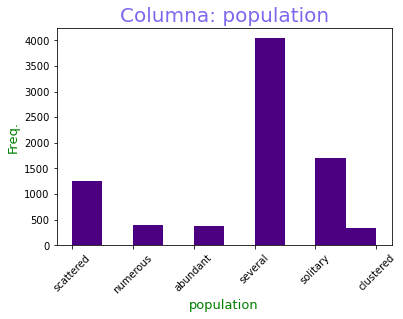

AxesSubplot(0.125,0.125;0.775x0.755)


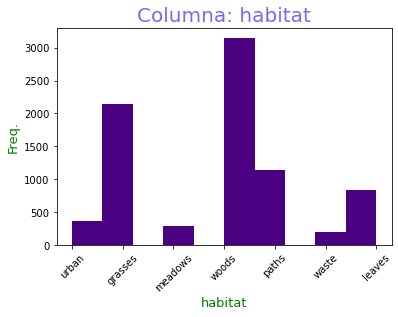

AxesSubplot(0.125,0.125;0.775x0.755)


In [33]:
getHistogramByColumn(mushrooms)

In [34]:
mushroomsdummies = pd.get_dummies(mushrooms, columns=mushrooms.columns)
mushroomsdummies

,class_Edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
